# Lecture 12 – Visualizing Numerical Variables

### Spark 010, Spring 2024

On Monday we looked at making Bar Charts for Categorical Variables. 

Today we will look at making Histograms for Numerical Variables.

### Numerical Distributions.

As always, we'll start by importing the requisite packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Notice this list includes seaborn which we haven't used too much but which does have a bunch of helpful built-in data sets for us to play around with. 

Here's a full list of sets from seaborn:

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

For now we will work with the tips data set. 

In [3]:
tips = sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
tips.columns.values

array(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'],
      dtype=object)

### Review: Bar Charts

**Review: Bar Charts** can be used to look at categorical variables. 

The tips data set contains money (and tips) left by diners for different meals. 

Let's look at the meals in our data set.

In [5]:
tips_by_mealtime = tips['time'].value_counts()
tips_by_mealtime

time
Dinner    176
Lunch      68
Name: count, dtype: int64

Let's make a bar chart of our cookie distribution data.

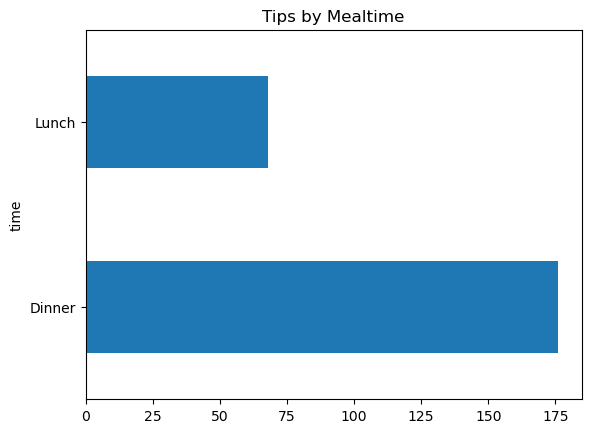

In [6]:
ax=tips_by_mealtime.plot.barh(x='time',title='Tips by Mealtime')

## Using np.arange()
NumPy function **np.arange()** creates a sequence of numbers.

np.arange(start,stop)

Array ranges work like indexing; 
- inclusive of start;
- exclusive of end;

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
arr=np.arange(3,9)
arr

array([3, 4, 5, 6, 7, 8])

np.arange(start,stop,step) 
Array of all integers from start to (stop-1) counting by step.

In [9]:
np.arange(3,9,3)

array([3, 6])

In [10]:
arr=np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

We can also do different operations on the output of np.arange!
Like suming all the entries!

In [11]:
np.sum(arr)

55

In [12]:
np.arange(3,11,12)

array([3])

Note: Negative steps work as well!

In [13]:
np.arange(10,1,-3)

array([10,  7,  4])

## Quick Check 1:

What will the following cells output?

Put your answer in the ... below:

| Comand      | Output |
| ----------- | ----------- |
| np.arange(5)      | ...       |
| np.arange(3,13,3)   | ...        |
| 2**np.arange(8)   | ...        |
| np.sum(np.arange(4)** 2)   | ...        |



### Numerical Distributions, Histograms

Bar charts visualize distributions of a **categorical variable** or the relationship between a **categorical variable** and one or more numerical variables.

Bar Charts **cannot** display the distribution of a **numerical variable**.

To make a Chart what works like a Bar Chart with numerical variables, we put the numerical values into bins!

**Binning** is counting the number of numerical values that fall within ranges called *bins*.

- A bin is defined by a left end point (lower bound) and a right end point (upper bount)
- A value *falls in a bin* if it is greater than (or equal to) the left end point, and less than the right end point: [a,b)
- The *width* of a bind is the right end point minus the left end point: (b-d)

**Histograms** visualize the distribution of a numerical variable by binning.

In [14]:
tipValue = tips['tip']

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

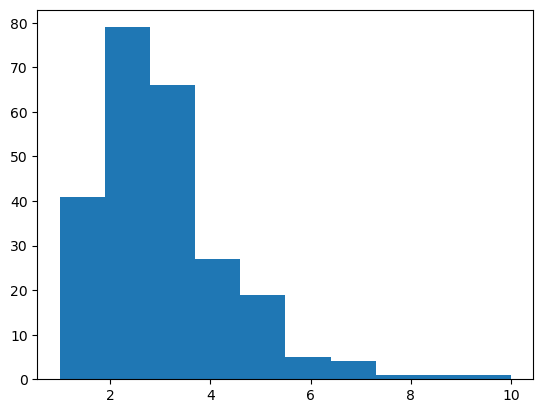

In [15]:
plt.hist(tipValue)

We can also retrieve the bin end points and the number of counts (the height) of each bin.

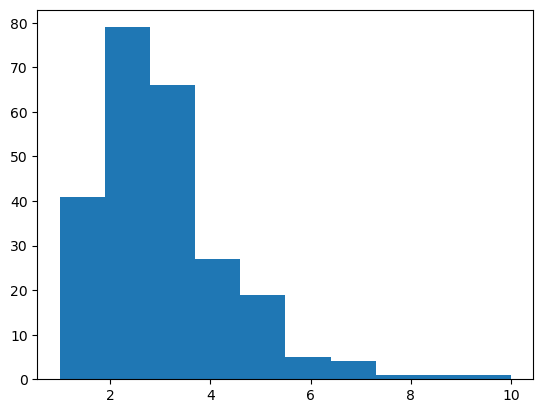

In [16]:
values, bins, plot = plt.hist(tipValue)

In [17]:
values

array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.])

In [18]:
bins

array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ])

In [19]:
len(tipValue)

244

In [20]:
sum(values)

244.0

In [21]:
sum(tipValue<1.9)

41

In [22]:
sum((tipValue>=1.9)*(tipValue<2.8))

79

In [23]:
sum((tipValue>=3.7)*(tipValue<4.6))

27

In [24]:
sum((tipValue>=9.1)*(tipValue<=10.0))

1

### Quick Check 2

Consider this Bar Chart.

<img src="PretendHistogram.png" style="height:310px" />





**Question:** How many heights are between 60 (inclusive) and 64 inches (exclusive)?

Or how many heights are in the bin [60,64)?

**Your Answer Here**

**Question 2:** How many heights are between 62 (inclusive) and 68 inches (exclusive)?

Or how many heights are in the bin [62,68)?

**Your Answer Here**

## Choosing Bins

There are lots of ways to chose what bins we want for a histogram. We can specify a number of bins. (The default is 10).

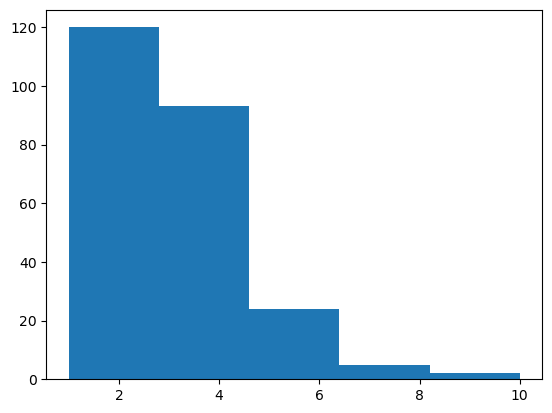

In [25]:
values, bins, plot = plt.hist(tipValue,bins = 5)

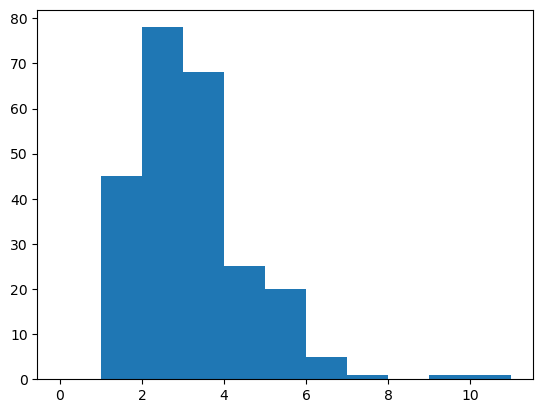

In [32]:
values, bins, plot = plt.hist(tipValue,bins = np.arange(12))

In [36]:
tips['total_bill'].min()

3.07

In [37]:
tips['total_bill'].max()

50.81

In [39]:
bins_3 = np.arange(3,54,3)
bins_3

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51])

In [41]:
bins_7 = np.arange(3,53,7)
bins_7

array([ 3, 10, 17, 24, 31, 38, 45, 52])

## Grouped Histograms

Sometimes we want to compare data from two different types of categories at the same time.

For example, let's look at the tips on a weekend versus the week day.

First, let's get two boolean vectors that tell us which entries are weekends and which are weekdays. 

In [66]:
weekendValues = tips['day'].isin(['Sun','Sat']);
weekdayValues = ~tips['day'].isin(['Sun','Sat']);

Now, let's get the separate tip data for both!

In [68]:
weekendTipValues = tips[weekendValues]['tip']
weekdayTipValues = tips[weekdayValues]['tip']

Now we can show mutliple histograms at the same time!

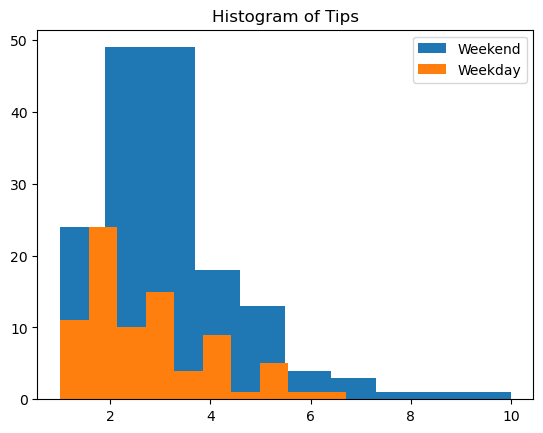

In [69]:
plt.hist(weekendTipValues, label='Weekend') 
  
plt.hist(weekdayTipValues, label='Weekday') 
  
plt.legend(loc='upper right') 
plt.title('Histogram of Tips') 
plt.show()

Notice this looks a little funny, the two data sets have different numbers of bins. So we can play with that a bit.

When two sets have different numbers of measurements. It can be helpful to look at a probability distribution or other measure that's a little more complicated than a histogram.

For now, we just can compare the shapes.

But, we can also see that the two distributions cover one another. 

We can make things better if we use a parameter *alpha* to make things more transparent. 

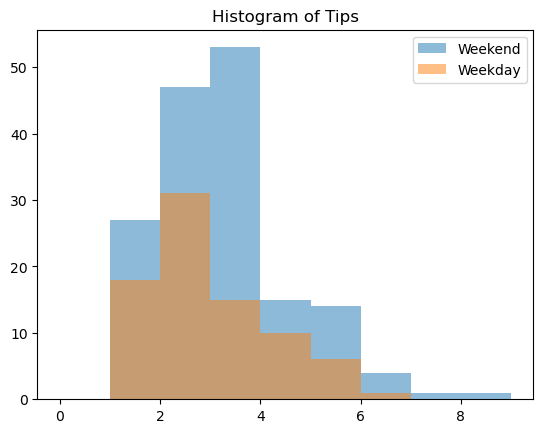

In [74]:
plt.hist(weekendTipValues, alpha = 0.5, label='Weekend',bins = np.arange(10)) 
  
plt.hist(weekdayTipValues, alpha = 0.5, label='Weekday',bins = np.arange(10)) 
  
plt.legend(loc='upper right') 
plt.title('Histogram of Tips') 
plt.show()